In [16]:
import math
import random

# Q1

In [17]:
nodes = 7624
vertcies = 27806

gnp_graph = {}

In [18]:
success = 0

while success < vertcies:
    start = random.randint(1, nodes)
    end = random.randint(1, nodes)

    if start == end:
        continue  # we hate self loop

    if start in gnp_graph.keys():  # check already exist this node are not
        # if exist no need to make set()
        if end in gnp_graph[start]:
            continue
        else:
            success += 1
            gnp_graph[start].add(end)
            if end in gnp_graph.keys():
                gnp_graph[end].add(start)
            else:
                gnp_graph[end] = set()
                gnp_graph[end].add(start)

    else:
        success += 1
        gnp_graph[start] = set()
        gnp_graph[start].add(end)

        if end in gnp_graph.keys():
            gnp_graph[end].add(start)
        else:
            gnp_graph[end] = set()
            gnp_graph[end].add(start)

In [19]:
success

27806

# b

### small world

In [20]:
def add_edge_to_graph(graph_edges: dict, node1: int, node2: int):  # this function add unidirection node
    if node1 in graph_edges.keys():
        if node2 in graph_edges[node1]:
            #repeated
            return False

        graph_edges[node1].add(node2)
    else:
        graph_edges[node1] = set()
        graph_edges[node1].add(node2)

    if node2 in graph_edges.keys():
        if node1 in graph_edges[node2]:
            #repeated
            return False
        graph_edges[node2].add(node1)
    else:
        graph_edges[node2] = set()
        graph_edges[node2].add(node1)

    return True

In [21]:
def remove_edge_to_graph(graph_edges: dict[int, set], node1: int, node2: int):
    keys = graph_edges.keys()
    if node1 in keys:
        graph_edges[node1].discard(node2)

    if node2 in keys:
        graph_edges[node2].discard(node1)

In [22]:
edges_small_word = {}
small_success = 0

first step make one step links and 3 step links

In [23]:
for i in range(nodes):
    small_success += 3
    add_edge_to_graph(edges_small_word, i, (i + 1) % nodes)
    add_edge_to_graph(edges_small_word, i, (i + 2) % nodes)
    add_edge_to_graph(edges_small_word, i, (i + 3) % nodes)

In [24]:
small_success

22872

# remove some edges with probability of p

In [25]:
p = 0.1
for node1 in edges_small_word.keys():
    neighbours = list(edges_small_word[node1])
    for node2 in neighbours:
        if random.random() < p:
            small_success -= 1
            remove_edge_to_graph(edges_small_word, node1, node2)
print(f'number of edges :{small_success}')

number of edges :18530


complete the graph

In [26]:
while small_success < vertcies:
    start = random.randint(0, nodes)
    end = random.randint(0, nodes)

    if start == end:
        continue  # we hate self loop

    if add_edge_to_graph(edges_small_word, start, end):
        small_success += 1

In [27]:
small_success

27806

In [28]:
edges_small_word

{0: {3, 1400, 7621, 7623},
 1: {2, 3, 719, 3680, 3880, 4252, 7225, 7622, 7623},
 2: {1, 3, 4, 5, 2244, 2480, 7582, 7623},
 3: {0, 1, 2, 4, 6, 2514, 6210},
 4: {2, 3, 5, 7, 1518, 2522, 3631, 4352, 4710, 6064},
 5: {2, 4, 6, 7, 8, 797, 3818, 4595},
 6: {3, 5, 8, 9, 5454, 7569},
 7: {4, 5, 8, 4652},
 8: {5, 6, 7, 10, 778, 1866},
 9: {6, 10, 11, 1562, 3132, 3357, 6280},
 10: {8, 9, 11, 13, 2495},
 11: {9, 10, 12, 14, 712, 5342, 7005, 7008},
 12: {11, 13, 14, 15, 3873, 4212, 6621},
 13: {10, 12, 14, 15, 16, 6082},
 14: {11, 12, 13, 17, 710, 1789, 3754, 6363, 7020},
 15: {12, 13, 16, 18, 7300},
 16: {13, 15, 18, 19, 494, 4536},
 17: {14, 18, 19, 20, 1685, 2410, 2694, 6264},
 18: {15, 16, 17, 21, 3509, 6288},
 19: {16, 17, 20, 21, 607, 4243, 5317, 5820},
 20: {17, 19, 21, 23},
 21: {18, 19, 20, 22, 23, 24, 2682, 6951},
 22: {21, 23, 24, 25, 5737, 5778},
 23: {20, 21, 22, 24, 25, 299, 4837},
 24: {21, 22, 23, 25, 26, 1124, 3612, 6932, 7205},
 25: {22, 23, 24, 27, 456, 3384, 3846},
 26: {24, 28

# c

In [29]:
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv("lastfm_asia_edges.csv")

asia_dict = {}
for index, row in data.iterrows():
    node_1 = row['node_1']
    node_2 = row['node_2']
    add_edge_to_graph(asia_dict, node_1, node_2)

In [31]:
asia_dict

{0: {747},
 747: {0, 2020, 3683, 3855, 4704, 5610, 5892, 6363},
 1: {126, 580, 1222, 2194, 2204, 2639, 4257, 5735, 6478, 7146},
 4257: {1,
  180,
  217,
  295,
  409,
  445,
  510,
  1000,
  1698,
  1788,
  1856,
  2196,
  3020,
  3066,
  3501,
  4152,
  4811,
  4821,
  4864,
  5286,
  5595,
  6248,
  6399,
  6431,
  6562,
  6919,
  6996},
 2194: {1,
  78,
  758,
  1216,
  1304,
  1328,
  1444,
  1599,
  1701,
  1725,
  2197,
  2204,
  2707,
  3495,
  3520,
  3605,
  3633,
  3853,
  3938,
  4632,
  4925,
  4955,
  7464},
 580: {1},
 6478: {1,
  1352,
  2196,
  2705,
  3022,
  3039,
  3055,
  3317,
  3509,
  3701,
  3948,
  4083,
  4535,
  4811,
  5094,
  5167,
  5370,
  5461,
  5835,
  6248,
  6529,
  6919},
 1222: {1,
  111,
  1621,
  1870,
  2001,
  2475,
  2498,
  4364,
  4730,
  4863,
  4922,
  5158,
  6241,
  6668,
  7351},
 5735: {1, 642, 882, 1132, 2914, 5353, 5625, 6562},
 7146: {1, 2460, 3073, 3379},
 2204: {1,
  858,
  953,
  1281,
  1304,
  1444,
  1663,
  1701,
  1711,
  17

# d

In [32]:
import collections
import matplotlib.pyplot as plt

In [33]:
def log_log_ploter(graph: dict, title=""):
    score_board = {}
    for node in graph.keys():
        node_degree = len(graph[node])
        score_board[node_degree] = score_board.get(node_degree, 0) + 1

    x = []
    y = []

    for key in score_board.keys():
        x.append(key)
        y.append(score_board[key])

    x = np.array(x)
    y = np.array(y)

    x = np.log2(x)
    y = np.log2(y)

    plt.title(title)
    plt.ylabel("log count")
    plt.xlabel("log degree")
    plt.scatter(x, y)
    plt.show()

    return x, y

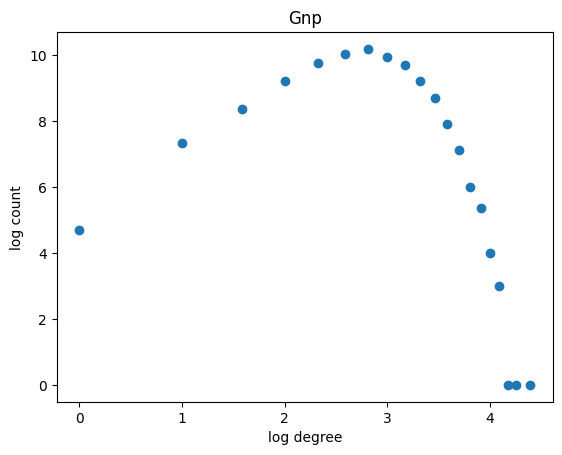

In [34]:
gnp_x, gnp_y = log_log_ploter(gnp_graph, "Gnp")

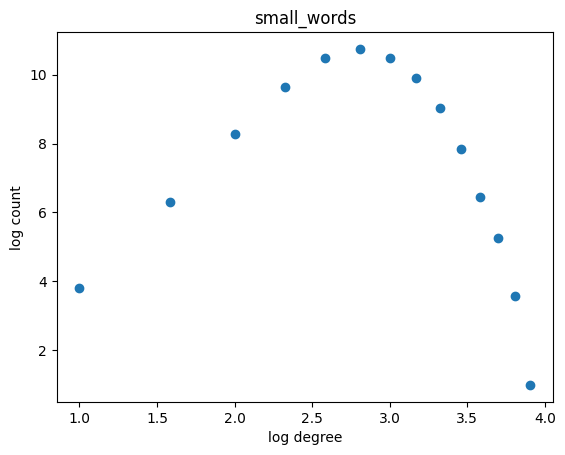

In [35]:
small_x, small_y = log_log_ploter(edges_small_word, "small_words")

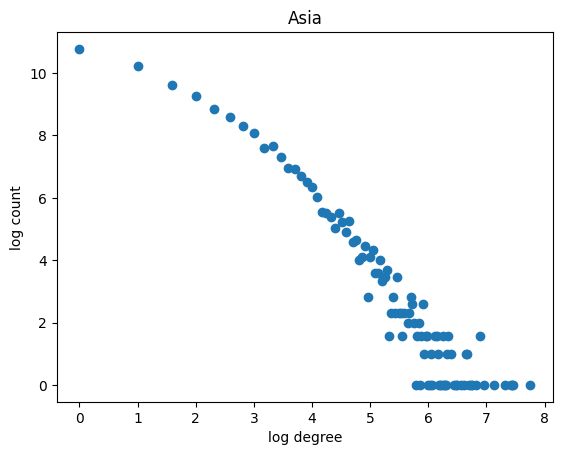

In [36]:
asia_x, asia_y = log_log_ploter(asia_dict, "Asia")

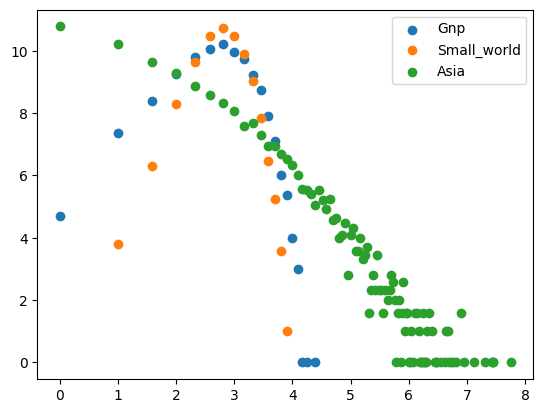

In [37]:
plt.scatter(gnp_x, gnp_y, label="Gnp")
plt.scatter(small_x, small_y, label="Small_world")
plt.scatter(asia_x, asia_y, label="Asia")
plt.legend()
plt.show()

In [38]:
def plot_degree_distribuation(graph: dict[set], name):
    res = {}
    for node in graph.keys():
        res[len(graph[node])] = res.get(len(graph[node]), 0) + 1
    x, y = res.keys(), res.values()

    plt.title(f"degree distribution of {name}")
    plt.xlabel("degree")
    plt.scatter(x, y)
    plt.show()

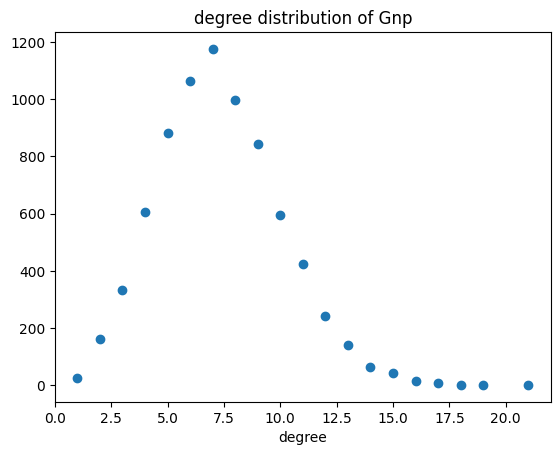

In [39]:
plot_degree_distribuation(gnp_graph, "Gnp")

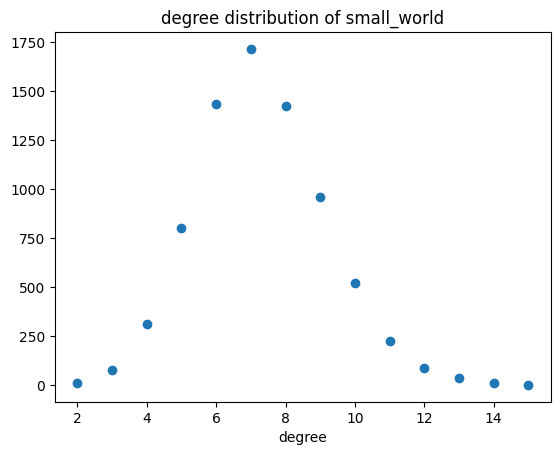

In [40]:
plot_degree_distribuation(edges_small_word, "small_world")

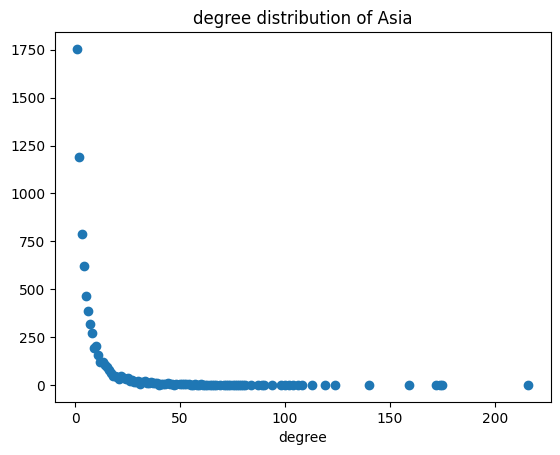

In [41]:
plot_degree_distribuation(asia_dict, "Asia")

# e

In [42]:
def calc_cluster_coefficient(graph: dict):
    sum_c = 0
    for node in graph.keys():
        c =node_coefficient(graph , node)
        sum_c += c

    result = sum_c / 7624
    return result

In [43]:
def node_coefficient(graph: dict[set], node):
    e = 0
    neighbours = graph[node]
    k = len(neighbours)
    if k == 1 or k == 0:
        return 0
    for neighbour_node in neighbours:
        neighbours_neighbour = graph[neighbour_node]
        e += len(neighbours_neighbour.intersection(neighbours))

    # c = 2 * e / (k * (k - 1))
    c = e / (k * (k - 1)) # already multiplied by 2 in for statement
                          # each edge calculated in two loop
    # sum_c += c
    return c


In [44]:
c = calc_cluster_coefficient(gnp_graph)
print(f'cluster coefficient Gnp : {c}')

cluster coefficient Gnp : 0.0010876855982867948


In [45]:
c = calc_cluster_coefficient(edges_small_word)
print(f'cluster coefficient small_world : {c}')

cluster coefficient small_world : 0.23007357571890058


In [46]:
c = calc_cluster_coefficient(asia_dict)
print(f'cluster coefficient Asia : {c}')

cluster coefficient Asia : 0.2194184243270858
